In [103]:
# Library

#Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

#Data Pre-Processing
import statsmodels.api as sm
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, OrdinalEncoder, LabelBinarizer

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Data Output
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix,f1_score
from sklearn.pipeline import Pipeline #menggabungkan proces

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_samples, silhouette_score

warnings.filterwarnings('ignore')

In [104]:
#Defining Function

def dataDescription(df):
    tempList = []
    for col in df.columns:
        tempList.append(
            [col,
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df)*100,2),
            df[col].nunique(),
            #list(df[col].drop_duplicates().sample(5,replace=True).values)
            list(df[col].drop_duplicates().sort_values().values)
            ]
        )

    descData = pd.DataFrame(data = tempList,
                            columns = ['Col','Data Type','Missing Value', 'Pct Missing Value','Num Unique','Unique Sample']
                            )
    display(descData)

def normalCheckShapiro(data):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")


In [105]:
df = pd.read_csv('german_credit_data.csv')

#Descriptive Analysis
display(df.info(),df.describe(),df.isnull().sum(),df.head(),dataDescription(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


,Col,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Age,int64,0,0.0,53,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3..."
2,Sex,object,0,0.0,2,"[female, male]"
3,Job,int64,0,0.0,4,"[0, 1, 2, 3]"
4,Housing,object,0,0.0,3,"[free, own, rent]"
5,Saving accounts,object,183,18.3,4,"[little, moderate, quite rich, rich, nan]"
6,Checking account,object,394,39.4,3,"[little, moderate, rich, nan]"
7,Credit amount,int64,0,0.0,921,"[250, 276, 338, 339, 343, 362, 368, 385, 392, ..."
8,Duration,int64,0,0.0,33,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
9,Purpose,object,0,0.0,8,"[business, car, domestic appliances, education..."


None

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


None

In [106]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')
df.drop(columns='Unnamed: 0', inplace=True)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>]], dtype=object)

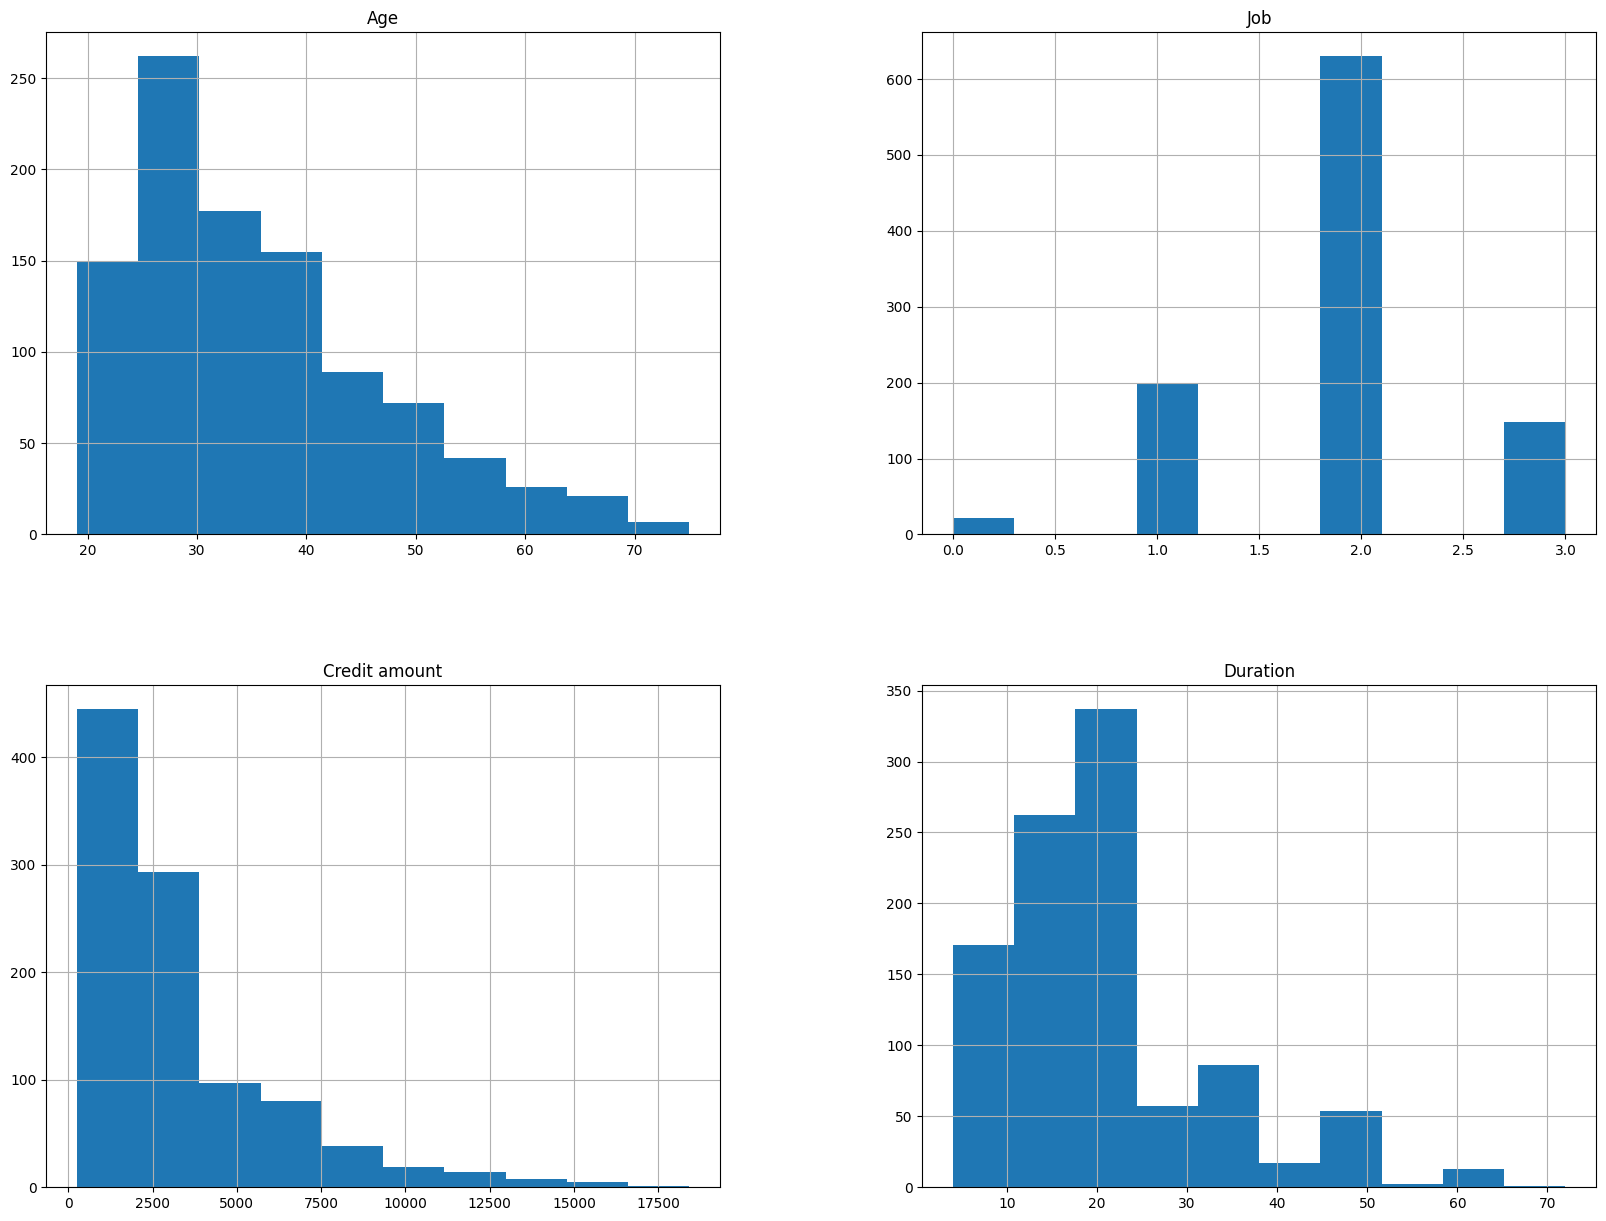

In [107]:
df.hist(figsize = (20,15))

ketika misal yang mana lebih bagus antara robist dan sandar, compare to metrics -> Silahuetee

In [108]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
unknown       183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

<Axes: >

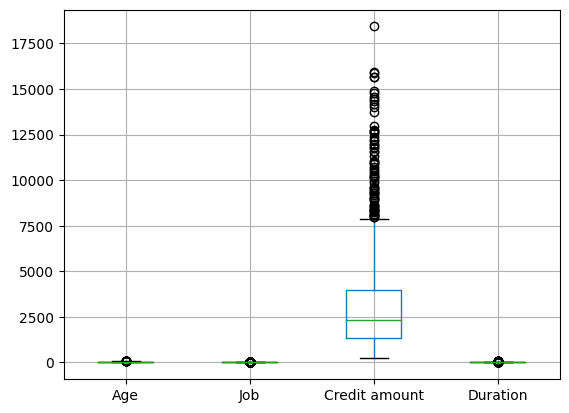

In [109]:
df.boxplot()

strategi pre-processing:

- Unnamed: 0 -> drop
- Age -> Robust Scaling
- Sex -> OneHot Encoder
- Job -> 
- Housing -> OneHot Encoder
- Saving accounts -> Ordinal Encoder
- Checking account -> Ordinal Encoder
- Credit amount -> Robust Scaling
- Duration -> Robust Scaling
- Purpose -> Binary Encoder

In [110]:
robust_cols = ['Age','Credit amount','Duration']
ordinal_cols = ['Saving accounts','Checking account']
onehot_cols = ['Sex','Housing']
binary_cols = ['Purpose']


pipe = Pipeline([
    (('BE', BinaryEncoder()))
])

transformer = ColumnTransformer([
    ('robustScaler',RobustScaler(),robust_cols),
    ('ordinalEncoder',OrdinalEncoder(),ordinal_cols),
    ('onehotEncoder',OneHotEncoder(),onehot_cols),
    ('binaryEncoder',pipe,binary_cols)
],remainder='passthrough')

In [111]:
df_prepro = transformer.fit_transform(df)

In [112]:
df_prepro = pd.DataFrame(df_prepro)
df_prepro

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.266667,-0.441354,-1.00,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,-0.733333,1.393114,2.50,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1.066667,-0.085739,-0.50,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.800000,2.133883,2.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
4,1.333333,0.978421,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.133333,-0.223842,-0.50,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
996,0.466667,0.589815,1.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
997,0.333333,-0.581375,-0.50,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
998,-0.666667,-0.182027,2.25,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [113]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robustScaler', RobustScaler(),
                                 ['Age', 'Credit amount', 'Duration']),
                                ('ordinalEncoder', OrdinalEncoder(),
                                 ['Saving accounts', 'Checking account']),
                                ('onehotEncoder', OneHotEncoder(),
                                 ['Sex', 'Housing']),
                                ('binaryEncoder',
                                 Pipeline(steps=[('BE', BinaryEncoder())]),
                                 ['Purpose'])])

In [114]:
feature

['Age',
 'Credit amount',
 'Duration',
 'Saving accounts',
 'Checking account',
 'Sex_female',
 'Sex_male',
 'Housing_free',
 'Housing_own',
 'Housing_rent',
 'Purpose_0',
 'Purpose_1',
 'Purpose_2',
 'Purpose_3',
 'Job']

In [115]:
feature = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + list(transformer.transformers_[2][1].get_feature_names_out()) + list(transformer.transformers_[3][1].get_feature_names_out())  + ['Job']

df_prepro.columns = feature

df_prepro

,Age,Credit amount,Duration,Saving accounts,Checking account,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Job
0,2.266667,-0.441354,-1.00,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,-0.733333,1.393114,2.50,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1.066667,-0.085739,-0.50,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.800000,2.133883,2.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
4,1.333333,0.978421,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.133333,-0.223842,-0.50,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
996,0.466667,0.589815,1.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
997,0.333333,-0.581375,-0.50,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
998,-0.666667,-0.182027,2.25,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [116]:
#Get Best Cluster
k = []

for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(df_prepro)
    k.append(silhouette_score(df_prepro,labels=kmeans.labels_, metric='euclidean'))

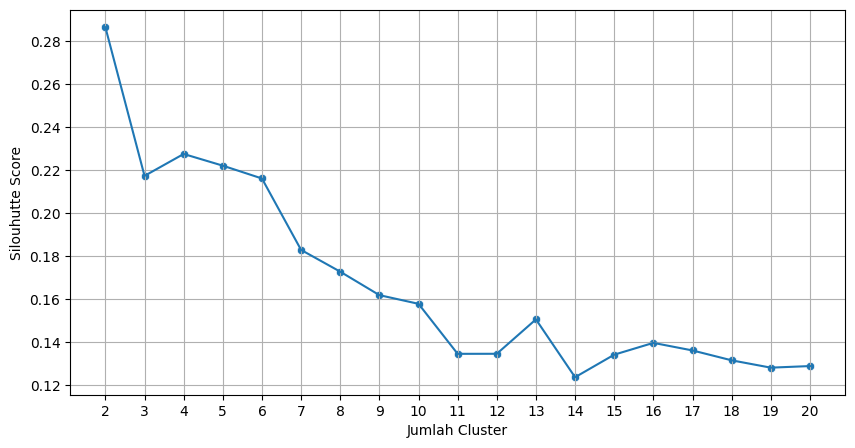

In [117]:
plt.figure(figsize=(10,5))

sns.lineplot(
    x = range(2,21),
    y = k
)

sns.scatterplot(
    x = range(2,21),
    y = k
)

plt.xticks(range(2,21))

plt.grid()
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silouhutte Score')

plt.show()

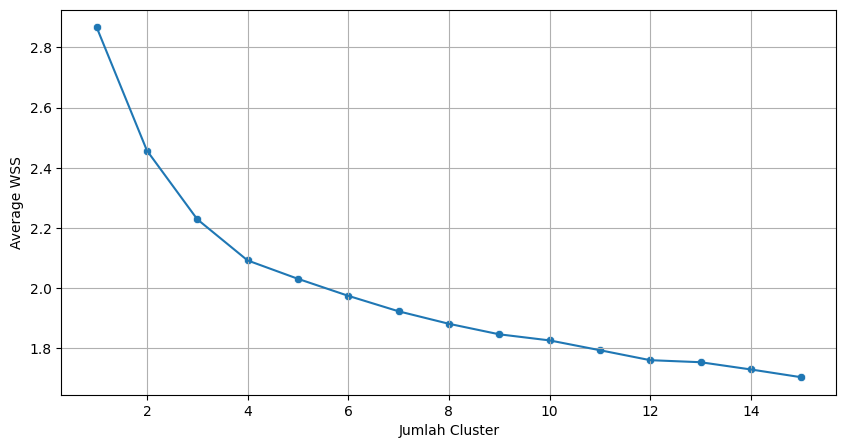

In [118]:
#Elbow Method
k = range(1,16)
clustering = [KMeans(n_clusters=i).fit(df_prepro) for i in k] #Loop kelas clustering
centroid = [x.cluster_centers_ for x in clustering]# Menentukan nilai centroid (Pusat df_prepro) pada setiap kluster
clustering

#within sum square
D_k = [cdist(df_prepro, cent, 'euclidean') for cent in centroid] #Jarak antar df_prepro point
CIdx = [np.argmin(D,axis=1) for D in D_k] # Index 
dist = [np.min(D, axis=1) for D in D_k]
avgWSS = [sum(d)/df_prepro.shape[0] for d in dist] #Nilai rata-rata jarak terkecil

plt.figure(figsize=(10,5))

sns.lineplot(
    x = k,
    y = avgWSS
)

sns.scatterplot(
    x = k,
    y = avgWSS
)

plt.grid()
plt.xlabel('Jumlah Cluster')
plt.ylabel('Average WSS')

plt.show()

In [119]:
kmean = KMeans(n_clusters=4)
kmean.fit(df_prepro)
df['Cluster'] = kmean.labels_
df['Cluster'] = df['Cluster'].astype('category')

In [120]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,2
4,53,male,2,free,little,little,4870,24,car,3
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,3
997,38,male,2,own,little,unknown,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,3


In [121]:
cluster_size = df.groupby(['Cluster'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Cluster,size,Percentage
0,0,225,0.225
1,1,295,0.295
2,2,126,0.126
3,3,354,0.354


In [128]:
df.groupby('Cluster').describe()

Age                                                        Job   
         count       mean        std   min   25%   50%   75%   max  count   
Cluster                                                                     
0        225.0  37.333333  11.371958  19.0  29.0  36.0  44.0  75.0  225.0  \
1        295.0  35.779661  11.001032  19.0  27.0  33.0  42.0  74.0  295.0   
2        126.0  35.984127  11.814557  21.0  27.0  32.5  42.0  75.0  126.0   
3        354.0  34.059322  11.382327  20.0  25.0  31.0  40.0  74.0  354.0   

                   ... Credit amount          Duration                         
             mean  ...           75%      max    count       mean        std   
Cluster            ...                                                         
0        1.902222  ...       4591.00  14555.0    225.0  21.035556  11.355009  \
1        1.881356  ...       2868.00   7393.0    295.0  16.901695   8.357275   
2        2.325397  ...      10258.75  18424.0    126.0  40.039683  11.729212   
3        1.774011  ...       3020.00   7865.0    354.0  17.341808   8.123976   

                                      
         min   25%   50%   75%   max  
Cluster                               
0        4.0  12.0  20.0  24.0  60.0  
1        4.0  12.0  15.0  24.0  48.0  
2        6.0  36.0  39.0  48.0  72.0  
3        6.0  12.0  15.0  24.0  45.0  

[4 rows x 32 columns]

Kurangin feature
Context knowledge to choose best K -> 2
Describe each Cluster